In [98]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [99]:
import pandas as pd

bank_df = pd.read_csv('/content/drive/MyDrive/dl-11961/chap3-4/bank.csv', sep=',')
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,36,technician,single,secondary,no,265,yes,yes,NaN,5,may,348,1,-1,0,NaN,no
2,25,blue-collar,married,secondary,no,-7,yes,no,NaN,5,may,365,1,-1,0,NaN,no
3,53,technician,married,secondary,no,-3,no,no,NaN,5,may,1666,1,-1,0,NaN,no
4,24,technician,single,secondary,no,-103,yes,yes,NaN,5,may,145,1,-1,0,NaN,no


In [100]:
#Q1
bank_df.tail(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
7224,63,retired,married,primary,no,3738,no,no,telephone,9,nov,301,1,456,4,failure,no
7225,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success,yes
7226,33,admin.,single,secondary,no,690,no,no,cellular,10,nov,223,3,555,16,failure,no
7227,36,admin.,single,tertiary,no,980,no,no,cellular,11,nov,118,4,104,7,failure,no
7228,38,entrepreneur,single,secondary,no,2543,no,no,cellular,11,nov,357,3,93,5,success,yes
7229,25,services,single,secondary,no,199,no,no,cellular,16,nov,173,1,92,5,failure,no
7230,28,self-employed,single,tertiary,no,159,no,no,cellular,16,nov,449,2,33,4,success,yes
7231,59,management,married,tertiary,no,138,yes,yes,cellular,16,nov,162,2,187,5,failure,no
7232,37,management,married,tertiary,no,1428,no,no,cellular,16,nov,333,2,-1,0,NaN,no
7233,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,NaN,yes


In [101]:
bank_df.shape

(7234, 17)

In [102]:
bank_df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [103]:
#欠損値の確認
display(bank_df.isnull().any(axis=1))
display(bank_df.isnull().any(axis=0))

0        True
1        True
2        True
3        True
4        True
        ...  
7229    False
7230    False
7231    False
7232     True
7233     True
Length: 7234, dtype: bool

age          False
job           True
marital      False
education     True
default      False
balance      False
housing      False
loan         False
contact       True
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome      True
y            False
dtype: bool

In [104]:
display(bank_df.isnull().sum(axis=1))
display(bank_df.isnull().sum(axis=0))

0       2
1       2
2       2
3       2
4       2
       ..
7229    0
7230    0
7231    0
7232    1
7233    1
Length: 7234, dtype: int64

age             0
job            44
marital         0
education     273
default         0
balance         0
housing         0
loan            0
contact      2038
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome     5900
y               0
dtype: int64

In [105]:
#Q2
display(bank_df.isnull().sum(axis=1).sort_values(ascending=False))
display(bank_df.isnull().sum(axis=0).sort_values(ascending=False))

139     4
1762    4
1670    4
1814    4
1904    4
       ..
4667    0
4669    0
6038    0
6037    0
4047    0
Length: 7234, dtype: int64

poutcome     5900
contact      2038
education     273
job            44
month           0
previous        0
pdays           0
campaign        0
duration        0
age             0
day             0
loan            0
housing         0
balance         0
default         0
marital         0
y               0
dtype: int64

In [106]:
#統計量の計算
bank_df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,7234.000000,7234.000000,7234.000000,7234.000000,7234.000000,7234.000000,7234.000000
mean,40.834808,1374.912911,15.623860,262.875311,2.713989,40.277716,0.565939
std,10.706442,3033.882933,8.307826,268.921065,2.983740,99.188008,1.825100
min,2.000000,-3313.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,74.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,453.500000,16.000000,183.000000,2.000000,-1.000000,0.000000
75%,48.000000,1470.750000,21.000000,321.750000,3.000000,-1.000000,0.000000
max,157.000000,81204.000000,31.000000,3366.000000,44.000000,850.000000,40.000000


In [107]:
#Q3
bank_df.describe(include=[object])

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,7190,7234,6961,7234,7234,7234,5196,7234,1334,7234
unique,11,3,3,2,2,2,2,12,3,2
top,management,married,secondary,no,yes,no,cellular,may,failure,no
freq,1560,4343,3745,7101,4058,6066,4697,2202,772,6381


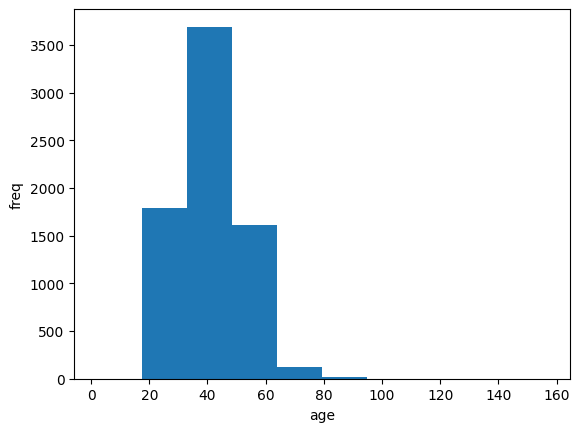

In [108]:
#データの可視化
import matplotlib.pyplot as plt

plt.hist(bank_df['age'])
plt.xlabel('age')
plt.ylabel('freq')
plt.show()

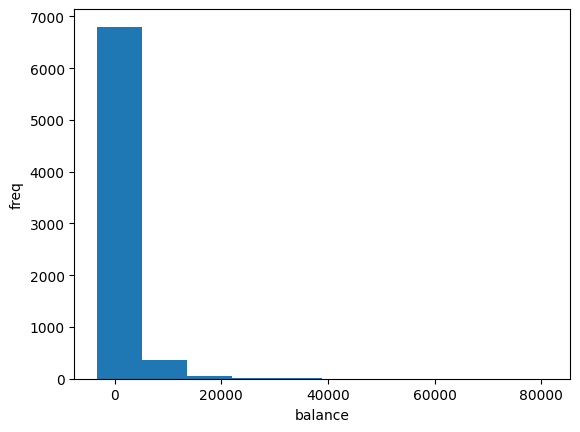

In [109]:
#Q4
plt.hist(bank_df['balance'])
plt.xlabel('balance')
plt.ylabel('freq')
plt.show()

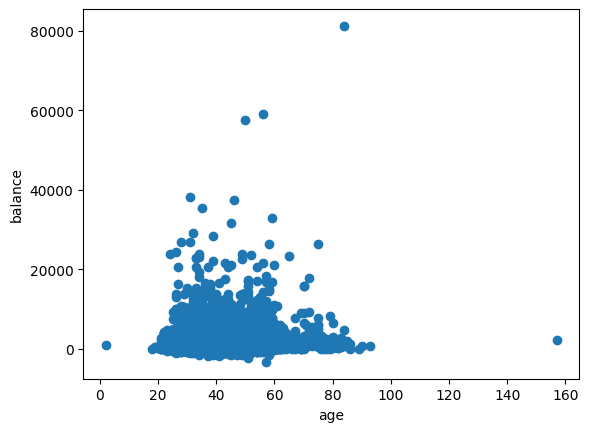

,age,balance
age,1.000000,0.112364
balance,0.112364,1.000000


In [110]:
plt.scatter(bank_df['age'], bank_df['balance'])
plt.xlabel('age')
plt.ylabel('balance')
plt.show()

#ageとbalanceの相関係数
bank_df[['age','balance']].corr()

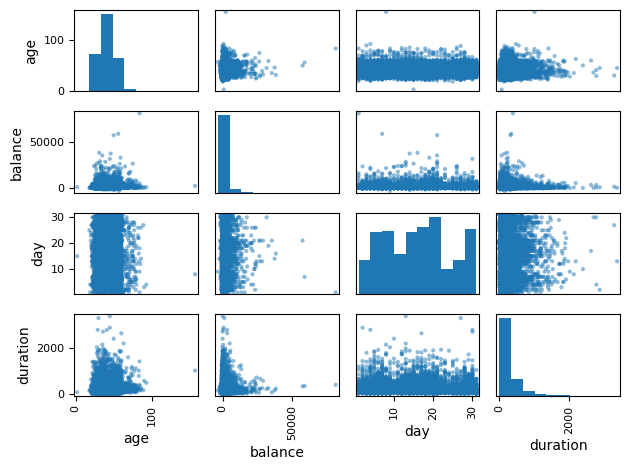

In [111]:
#Q5
#scatter_matrixメソッドで散布図行列を作る
pd.plotting.scatter_matrix(bank_df[['age','balance','day','duration']])
plt.tight_layout()
plt.show()


In [112]:
bank_df['job'].value_counts(ascending=False, normalize=True)

management       0.216968
blue-collar      0.208484
technician       0.167733
admin.           0.115994
services         0.091933
retired          0.048818
self-employed    0.035605
entrepreneur     0.033241
unemployed       0.031015
housemaid        0.028929
student          0.021280
Name: job, dtype: float64

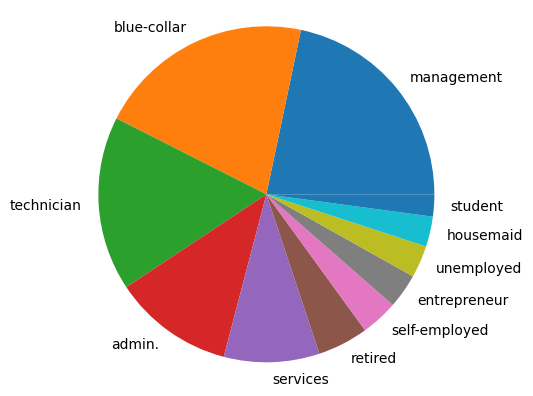

In [113]:
job_label = bank_df['job'].value_counts(ascending=False, normalize=True).index
job_vals = bank_df['job'].value_counts(ascending=False, normalize=True).values

plt.pie(job_vals, labels=job_label)
plt.axis('equal') #真円になるようにアスペクト比を固定
plt.show()

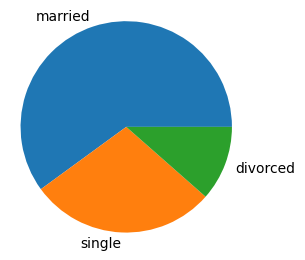

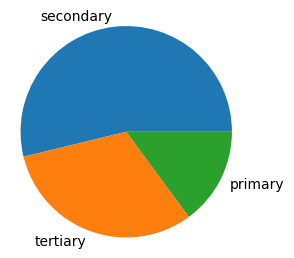

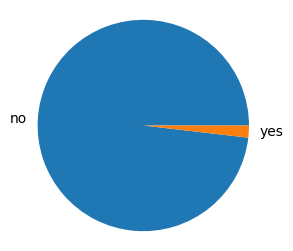

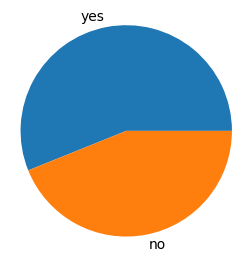

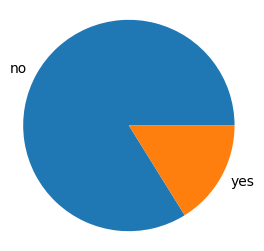

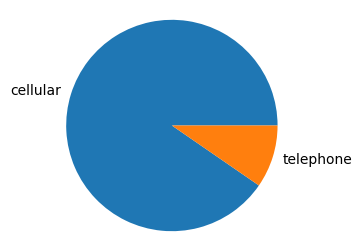

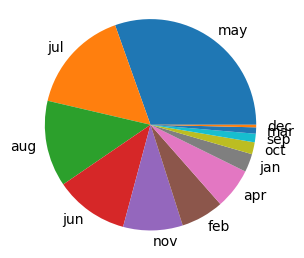

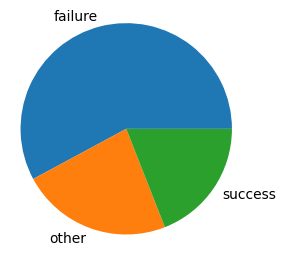

In [114]:
#Q6
#marital, education, default, housing, loan, contact, month, poutcome

input_list = ['marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

for column in input_list:
  values = bank_df[column].value_counts(ascending=False, normalize=True)
  labels = values.index
  data = values.values
  plt.figure(figsize=(3, 3))
  plt.pie(data, labels=labels)
  plt.axis('equal')
  plt.show()

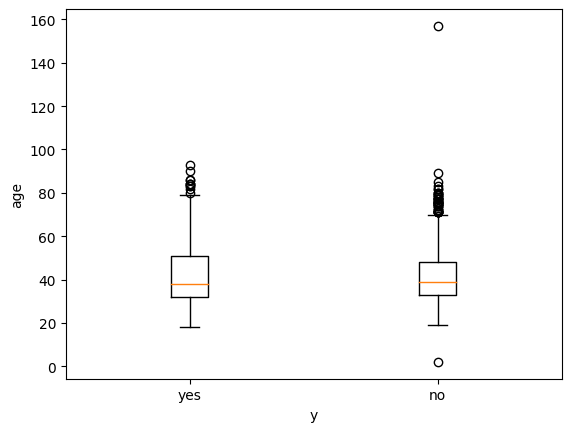

In [115]:
y_yes = bank_df[bank_df['y']=='yes']
y_no = bank_df[bank_df['y']=='no']
y_age = [y_yes['age'], y_no['age']]

#箱ひげ図
plt.boxplot(y_age)
plt.xlabel('y')
plt.ylabel('age')
ax = plt.gca()
plt.setp(ax, xticklabels = ['yes','no'])
plt.show()

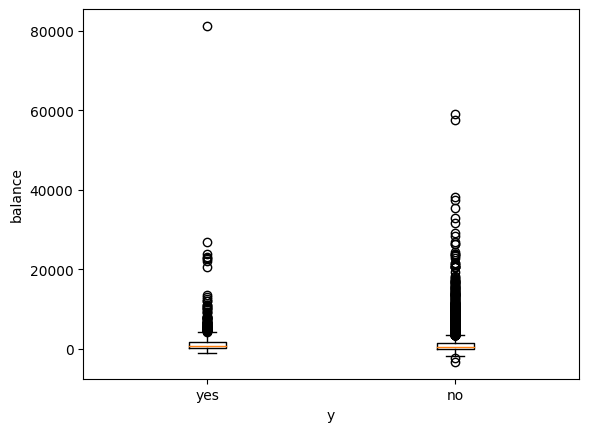

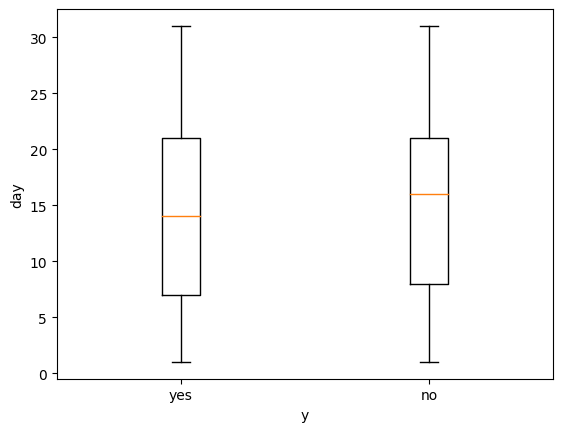

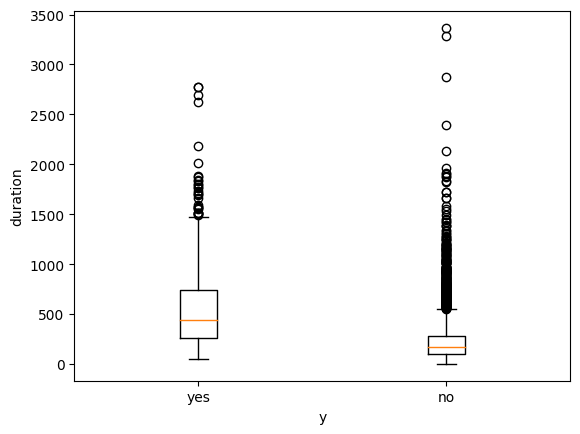

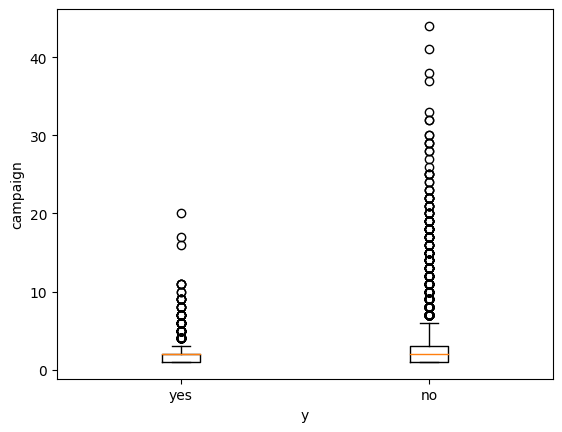

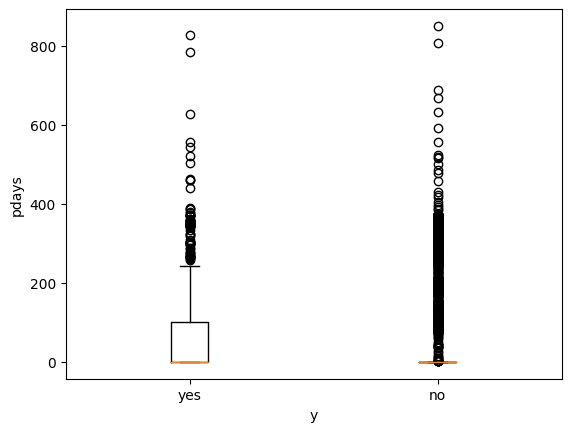

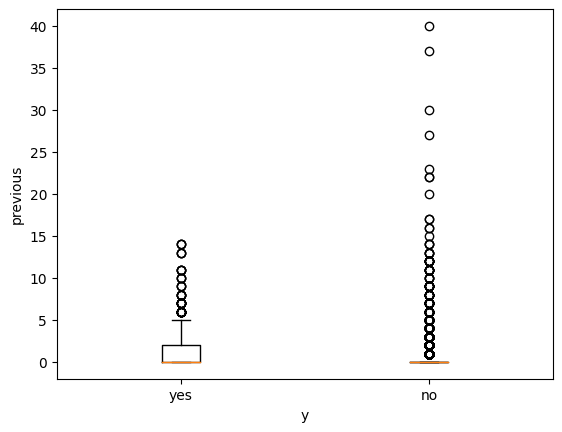

In [116]:
input_list_2 = ['balance', 'day','duration','campaign','pdays','previous']

for column in input_list_2:
  y_yes = bank_df[bank_df['y']=='yes']
  y_no = bank_df[bank_df['y']=='no']
  y_age = [y_yes[column], y_no[column]]

  #箱ひげ図
  plt.boxplot(y_age)
  plt.xlabel('y')
  plt.ylabel(column)
  ax = plt.gca()
  plt.setp(ax, xticklabels = ['yes','no'])
  plt.show()

In [117]:
#欠損値の除外
display(bank_df.shape)
bank_df = bank_df.dropna(subset=['job', 'education'])
display(bank_df.shape)

(7234, 17)

(6935, 17)

In [118]:
#Q8
display(bank_df.shape)
bank_df = bank_df.dropna(thresh=2400, axis=1)
display(bank_df.shape)

(6935, 17)

(6935, 16)

In [119]:
#文字列値の集約
bank_df.loc[(bank_df['job'] == 'management') |
            (bank_df['job'] == 'technician') |
            (bank_df['job'] == 'blue-collar') |
            (bank_df['job'] == 'admin.') |
            (bank_df['job'] == 'services') |
            (bank_df['job'] == 'self-employed') |
            (bank_df['job'] == 'entrepreneur') |
            (bank_df['job'] == 'housemaid'), 'job2' ] = 'worker'

bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y,job2
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,no,worker
1,36,technician,single,secondary,no,265,yes,yes,NaN,5,may,348,1,-1,0,no,worker
2,25,blue-collar,married,secondary,no,-7,yes,no,NaN,5,may,365,1,-1,0,no,worker
3,53,technician,married,secondary,no,-3,no,no,NaN,5,may,1666,1,-1,0,no,worker
4,24,technician,single,secondary,no,-103,yes,yes,NaN,5,may,145,1,-1,0,no,worker


In [120]:
#Q10
bank_df.loc[(bank_df['job'] == 'retired') |
            (bank_df['job'] == 'unemployed') |
            (bank_df['job'] == 'student'), 'job2' ] = 'non-worker'

bank_df.head(20)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y,job2
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,no,worker
1,36,technician,single,secondary,no,265,yes,yes,NaN,5,may,348,1,-1,0,no,worker
2,25,blue-collar,married,secondary,no,-7,yes,no,NaN,5,may,365,1,-1,0,no,worker
3,53,technician,married,secondary,no,-3,no,no,NaN,5,may,1666,1,-1,0,no,worker
4,24,technician,single,secondary,no,-103,yes,yes,NaN,5,may,145,1,-1,0,no,worker
5,60,retired,married,tertiary,no,100,no,no,NaN,5,may,528,1,-1,0,no,non-worker
6,55,technician,married,secondary,no,1205,yes,no,NaN,5,may,158,2,-1,0,no,worker
7,54,management,married,secondary,no,282,yes,yes,NaN,5,may,154,1,-1,0,no,worker
8,55,services,divorced,secondary,no,91,no,no,NaN,5,may,349,1,-1,0,no,worker
9,56,admin.,married,secondary,no,45,no,no,NaN,5,may,1467,1,-1,0,yes,worker


In [121]:
#monthも集約

bank_df.loc[(bank_df['month'] == 'jan') |
            (bank_df['month'] == 'feb') |
            (bank_df['month'] == 'mar'), 'month2'] = '1Q'

bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y,job2,month2
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,no,worker,NaN
1,36,technician,single,secondary,no,265,yes,yes,NaN,5,may,348,1,-1,0,no,worker,NaN
2,25,blue-collar,married,secondary,no,-7,yes,no,NaN,5,may,365,1,-1,0,no,worker,NaN
3,53,technician,married,secondary,no,-3,no,no,NaN,5,may,1666,1,-1,0,no,worker,NaN
4,24,technician,single,secondary,no,-103,yes,yes,NaN,5,may,145,1,-1,0,no,worker,NaN


In [122]:
#Q11

month_mapping = {
    'jan': '1Q',
    'feb': '1Q',
    'mar': '1Q',
    'apr': '2Q',
    'may': '2Q',
    'jun': '2Q',
    'jul': '3Q',
    'aug': '3Q',
    'sep': '3Q',
    'oct': '4Q',
    'nov': '4Q',
    'dec': '4Q'
}

bank_df['month2'] = bank_df['month'].map(month_mapping)

bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y,job2,month2
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,no,worker,2Q
1,36,technician,single,secondary,no,265,yes,yes,NaN,5,may,348,1,-1,0,no,worker,2Q
2,25,blue-collar,married,secondary,no,-7,yes,no,NaN,5,may,365,1,-1,0,no,worker,2Q
3,53,technician,married,secondary,no,-3,no,no,NaN,5,may,1666,1,-1,0,no,worker,2Q
4,24,technician,single,secondary,no,-103,yes,yes,NaN,5,may,145,1,-1,0,no,worker,2Q


In [123]:
#数値の集約
bank_df.loc[bank_df['day'] <= 10, 'day2'] = 'early'

In [124]:
#Q12
conditions = [
    (bank_df['day'] <= 10),
    (bank_df['day'] > 10) & (bank_df['day'] < 20),
    (bank_df['day'] >= 20)
]

choices = ['early', 'middle', 'late']

bank_df['day2'] = np.select(conditions, choices)

bank_df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y,job2,month2,day2
7229,25,services,single,secondary,no,199,no,no,cellular,16,nov,173,1,92,5,no,worker,4Q,middle
7230,28,self-employed,single,tertiary,no,159,no,no,cellular,16,nov,449,2,33,4,yes,worker,4Q,middle
7231,59,management,married,tertiary,no,138,yes,yes,cellular,16,nov,162,2,187,5,no,worker,4Q,middle
7232,37,management,married,tertiary,no,1428,no,no,cellular,16,nov,333,2,-1,0,no,worker,4Q,middle
7233,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,yes,worker,4Q,middle


In [125]:
cond = [
    (bank_df['duration'] < 300),
    (bank_df['duration'] >= 300)
]

op = ['short', 'long']

bank_df['duration2'] = np.select(cond, op)

cond_2 = [
    (bank_df['previous'] < 1),
    (bank_df['previous'] >= 1)
]

op_2 = ['zero', 'one-more']

bank_df['previous2'] = np.select(cond_2, op_2)

bank_df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,duration,campaign,pdays,previous,y,job2,month2,day2,duration2,previous2
7229,25,services,single,secondary,no,199,no,no,cellular,16,...,173,1,92,5,no,worker,4Q,middle,short,one-more
7230,28,self-employed,single,tertiary,no,159,no,no,cellular,16,...,449,2,33,4,yes,worker,4Q,middle,long,one-more
7231,59,management,married,tertiary,no,138,yes,yes,cellular,16,...,162,2,187,5,no,worker,4Q,middle,short,one-more
7232,37,management,married,tertiary,no,1428,no,no,cellular,16,...,333,2,-1,0,no,worker,4Q,middle,long,zero
7233,25,technician,single,secondary,no,505,no,yes,cellular,17,...,386,2,-1,0,yes,worker,4Q,middle,long,zero


In [126]:
#Q13
cond_3 = [
    (bank_df['pdays'] < 0),
    (bank_df['pdays'] >= 0)
]

op_3 = ['less', 'more']

bank_df['pdays2'] = np.select(cond_3, op_3)

bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,campaign,pdays,previous,y,job2,month2,day2,duration2,previous2,pdays2
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,...,1,-1,0,no,worker,2Q,early,short,zero,less
1,36,technician,single,secondary,no,265,yes,yes,NaN,5,...,1,-1,0,no,worker,2Q,early,long,zero,less
2,25,blue-collar,married,secondary,no,-7,yes,no,NaN,5,...,1,-1,0,no,worker,2Q,early,long,zero,less
3,53,technician,married,secondary,no,-3,no,no,NaN,5,...,1,-1,0,no,worker,2Q,early,long,zero,less
4,24,technician,single,secondary,no,-103,yes,yes,NaN,5,...,1,-1,0,no,worker,2Q,early,short,zero,less


In [127]:
#欠損値の補完
bank_df = bank_df.fillna({'contact':'unknown'})
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,campaign,pdays,previous,y,job2,month2,day2,duration2,previous2,pdays2
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,1,-1,0,no,worker,2Q,early,short,zero,less
1,36,technician,single,secondary,no,265,yes,yes,unknown,5,...,1,-1,0,no,worker,2Q,early,long,zero,less
2,25,blue-collar,married,secondary,no,-7,yes,no,unknown,5,...,1,-1,0,no,worker,2Q,early,long,zero,less
3,53,technician,married,secondary,no,-3,no,no,unknown,5,...,1,-1,0,no,worker,2Q,early,long,zero,less
4,24,technician,single,secondary,no,-103,yes,yes,unknown,5,...,1,-1,0,no,worker,2Q,early,short,zero,less


In [128]:
#外れ値の除外
bank_df = bank_df[bank_df['age']>=18]
bank_df = bank_df[bank_df['age']<100]

bank_df.shape

(6933, 22)

In [129]:
#文字列を数値へ変換
bank_df = bank_df.replace('yes', 1)
bank_df = bank_df.replace('no', 0)

bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,campaign,pdays,previous,y,job2,month2,day2,duration2,previous2,pdays2
0,58,management,married,tertiary,0,2143,1,0,unknown,5,...,1,-1,0,0,worker,2Q,early,short,zero,less
1,36,technician,single,secondary,0,265,1,1,unknown,5,...,1,-1,0,0,worker,2Q,early,long,zero,less
2,25,blue-collar,married,secondary,0,-7,1,0,unknown,5,...,1,-1,0,0,worker,2Q,early,long,zero,less
3,53,technician,married,secondary,0,-3,0,0,unknown,5,...,1,-1,0,0,worker,2Q,early,long,zero,less
4,24,technician,single,secondary,0,-103,1,1,unknown,5,...,1,-1,0,0,worker,2Q,early,short,zero,less


In [130]:
bank_df_job = pd.get_dummies(bank_df['job'])
bank_df_job.head()

,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed
0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,1,0


In [131]:
#Q9
input_list_3 = ['marital','education','contact','month']

bank_df_marital = pd.get_dummies(bank_df['marital'])
bank_df_education = pd.get_dummies(bank_df['education'])
bank_df_contact = pd.get_dummies(bank_df['contact'])
bank_df_month = pd.get_dummies(bank_df['month'])

In [132]:
tmp1 = bank_df[['age','default','balance','housing','loan','day','duration','campaign','pdays','previous','y']]

tmp1.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y
0,58,0,2143,1,0,5,261,1,-1,0,0
1,36,0,265,1,1,5,348,1,-1,0,0
2,25,0,-7,1,0,5,365,1,-1,0,0
3,53,0,-3,0,0,5,1666,1,-1,0,0
4,24,0,-103,1,1,5,145,1,-1,0,0


In [133]:
tmp2 = pd.concat([tmp1, bank_df_marital], axis=1)
tmp3 = pd.concat([tmp2, bank_df_education], axis=1)
tmp4 = pd.concat([tmp3, bank_df_contact], axis=1)
bank_df_new = pd.concat([tmp4, bank_df_month], axis=1)

bank_df_new.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,58,0,2143,1,0,5,261,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
1,36,0,265,1,1,5,348,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
2,25,0,-7,1,0,5,365,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
3,53,0,-3,0,0,5,1666,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
4,24,0,-103,1,1,5,145,1,-1,0,...,0,0,0,0,0,0,1,0,0,0


In [134]:
# 新規作成した項目のダミー変数化
bank_df_job2 = pd.get_dummies(bank_df['job2'])
bank_df_month2 = pd.get_dummies(bank_df['month2'])
bank_df_day2 = pd.get_dummies(bank_df['day2'])
bank_df_duration2 = pd.get_dummies(bank_df['duration2'])
bank_df_previous2 = pd.get_dummies(bank_df['previous2'])
bank_df_pdays2 = pd.get_dummies(bank_df['pdays2'])

In [135]:
# 水平結合
tmp5 = pd.concat([bank_df_new, bank_df_job2], axis=1)
tmp6 = pd.concat([tmp5, bank_df_month2], axis=1)
tmp7 = pd.concat([tmp6, bank_df_day2], axis=1)
tmp8 = pd.concat([tmp7, bank_df_duration2], axis=1)
tmp9 = pd.concat([tmp8, bank_df_previous2], axis=1)
bank_df_new2 = pd.concat([tmp9, bank_df_pdays2], axis=1)

# 先頭から5行目まで表示
bank_df_new2.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,4Q,early,late,middle,long,short,one-more,zero,less,more
0,58,0,2143,1,0,5,261,1,-1,0,...,0,1,0,0,0,1,0,1,1,0
1,36,0,265,1,1,5,348,1,-1,0,...,0,1,0,0,1,0,0,1,1,0
2,25,0,-7,1,0,5,365,1,-1,0,...,0,1,0,0,1,0,0,1,1,0
3,53,0,-3,0,0,5,1666,1,-1,0,...,0,1,0,0,1,0,0,1,1,0
4,24,0,-103,1,1,5,145,1,-1,0,...,0,1,0,0,0,1,0,1,1,0


In [136]:
bank_df_new2.to_csv('bank-prep2.csv', index=False)

# モデル作成


In [137]:
bank_df = pd.read_csv('/content/bank-prep2.csv', sep=',')
bank_df.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,4Q,early,late,middle,long,short,one-more,zero,less,more
0,58,0,2143,1,0,5,261,1,-1,0,...,0,1,0,0,0,1,0,1,1,0
1,36,0,265,1,1,5,348,1,-1,0,...,0,1,0,0,1,0,0,1,1,0
2,25,0,-7,1,0,5,365,1,-1,0,...,0,1,0,0,1,0,0,1,1,0
3,53,0,-3,0,0,5,1666,1,-1,0,...,0,1,0,0,1,0,0,1,1,0
4,24,0,-103,1,1,5,145,1,-1,0,...,0,1,0,0,0,1,0,1,1,0


In [138]:
#不均衡データの均衡化(目的変数yのyesが圧倒的に少ない)
#アンダーサンプリング(Under Sampling)
import numpy as np
from imblearn.under_sampling import RandomUnderSampler

X = np.array(bank_df_new.drop('y', axis=1))
Y = np.array(bank_df_new[['y']])
print(np.sum(Y == 1), np.sum(Y == 0))

sampler = RandomUnderSampler(random_state=42)
X, Y = sampler.fit_resample(X, Y)
print(np.sum(Y == 1), np.sum(Y == 0))


820 6113
820 820


In [139]:
from sklearn.feature_selection import SelectKBest

# SelectKBestで特徴量を5つ選択
selector = SelectKBest(k=5)
selector.fit(X, Y)
mask = selector.get_support()

# どの変数を選択したかを確認
print(bank_df_new.drop('y', axis=1).columns)
print(mask)

Index(['age', 'default', 'balance', 'housing', 'loan', 'day', 'duration',
       'campaign', 'pdays', 'previous', 'divorced', 'married', 'single',
       'primary', 'secondary', 'tertiary', 'cellular', 'telephone', 'unknown',
       'apr', 'aug', 'dec', 'feb', 'jan', 'jul', 'jun', 'mar', 'may', 'nov',
       'oct', 'sep'],
      dtype='object')
[False False False  True False False  True False False  True False False
 False False False False  True False  True False False False False False
 False False False False False False False]


In [140]:
#決定木モデルの作成と検証
from sklearn.model_selection import KFold
from sklearn import tree
from sklearn.metrics import accuracy_score

#KFlod交差検証
kf = KFold(n_splits=10, shuffle=True)
scores = []

for train_id, test_id, in kf.split(X):
  x = X[train_id]
  y = Y[train_id]
  clf = tree.DecisionTreeClassifier()
  clf.fit(x, y)
  pred_y = clf.predict(X[test_id])
  score = accuracy_score(Y[test_id], pred_y)
  scores.append(score)

scores = np.array(scores)
print(scores.mean(), scores.std())

0.7597560975609756 0.04449130816330414


In [141]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

#再現率
print(recall_score(Y[test_id], pred_y))
#適合率
print(precision_score(Y[test_id], pred_y))

0.75
0.7792207792207793


In [142]:
#パラメータの最適化

from sklearn.model_selection import GridSearchCV

params = {
    'criterion': ['entropy'],
    'max_depth':[2,4,6,8,10],
    'min_samples_leaf':[10,20,30,40,50],
}

clf_gs = GridSearchCV(tree.DecisionTreeClassifier(), params, cv=KFold(n_splits=10, shuffle=True), scoring='accuracy')

clf_gs.fit(X, Y)

print(clf_gs.best_score_)
print(clf_gs.best_params_)

0.798170731707317
{'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 20}


In [143]:
clf_best = tree.DecisionTreeClassifier(
    criterion='entropy', max_depth=10, min_samples_leaf=20
)

clf_best.fit(X,Y)

print(clf_best.feature_importances_)

[0.01496426 0.         0.04498507 0.09824143 0.01612625 0.0424749
 0.54403349 0.00916479 0.06363245 0.03981101 0.         0.00558156
 0.         0.         0.00303882 0.         0.         0.
 0.07026309 0.         0.01300379 0.         0.         0.
 0.00349388 0.         0.         0.0311852  0.         0.
 0.        ]
